In [2]:
!pip install plotly==5.7.0

^C


In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
import plotly.express as px
df = pd.read_csv("./data/maps-synthetic-data-v1.1.csv")

In [208]:
myfield = df["has_dep_diag"]
freq = myfield.value_counts()
counts = freq.values
labels = freq.index.tolist()
percentages = freq/freq.sum()
cumulative = percentages.cumsum()
cumulative

 No ICD-10 diagnosis of depression    0.913805
Yes ICD-10 diagnosis of depression    1.000000
Name: has_dep_diag, dtype: float64

<ipython-input-209-706f357284e9>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



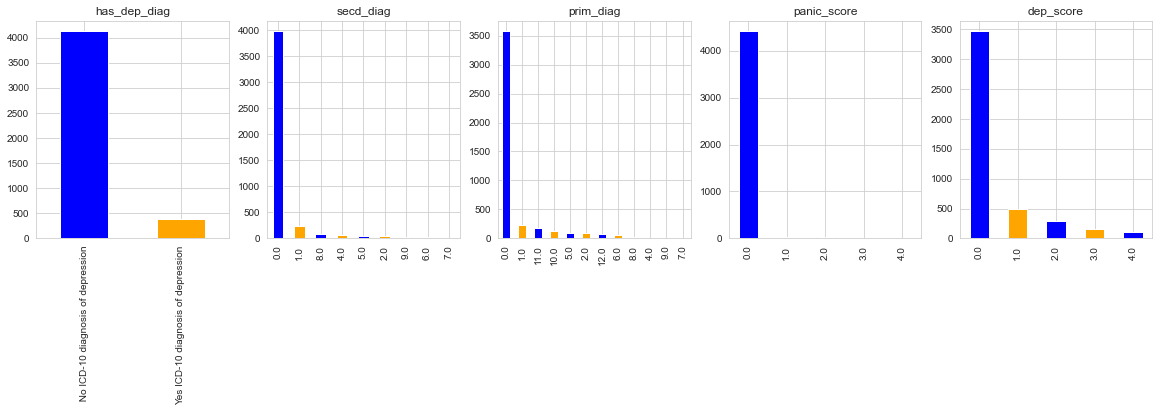

In [209]:
import seaborn as sns
sns.set_style("whitegrid")
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
cols = 5
rows = 1
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(20,4))
f=0
for i in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()


<ipython-input-210-ccedfb31aa29>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



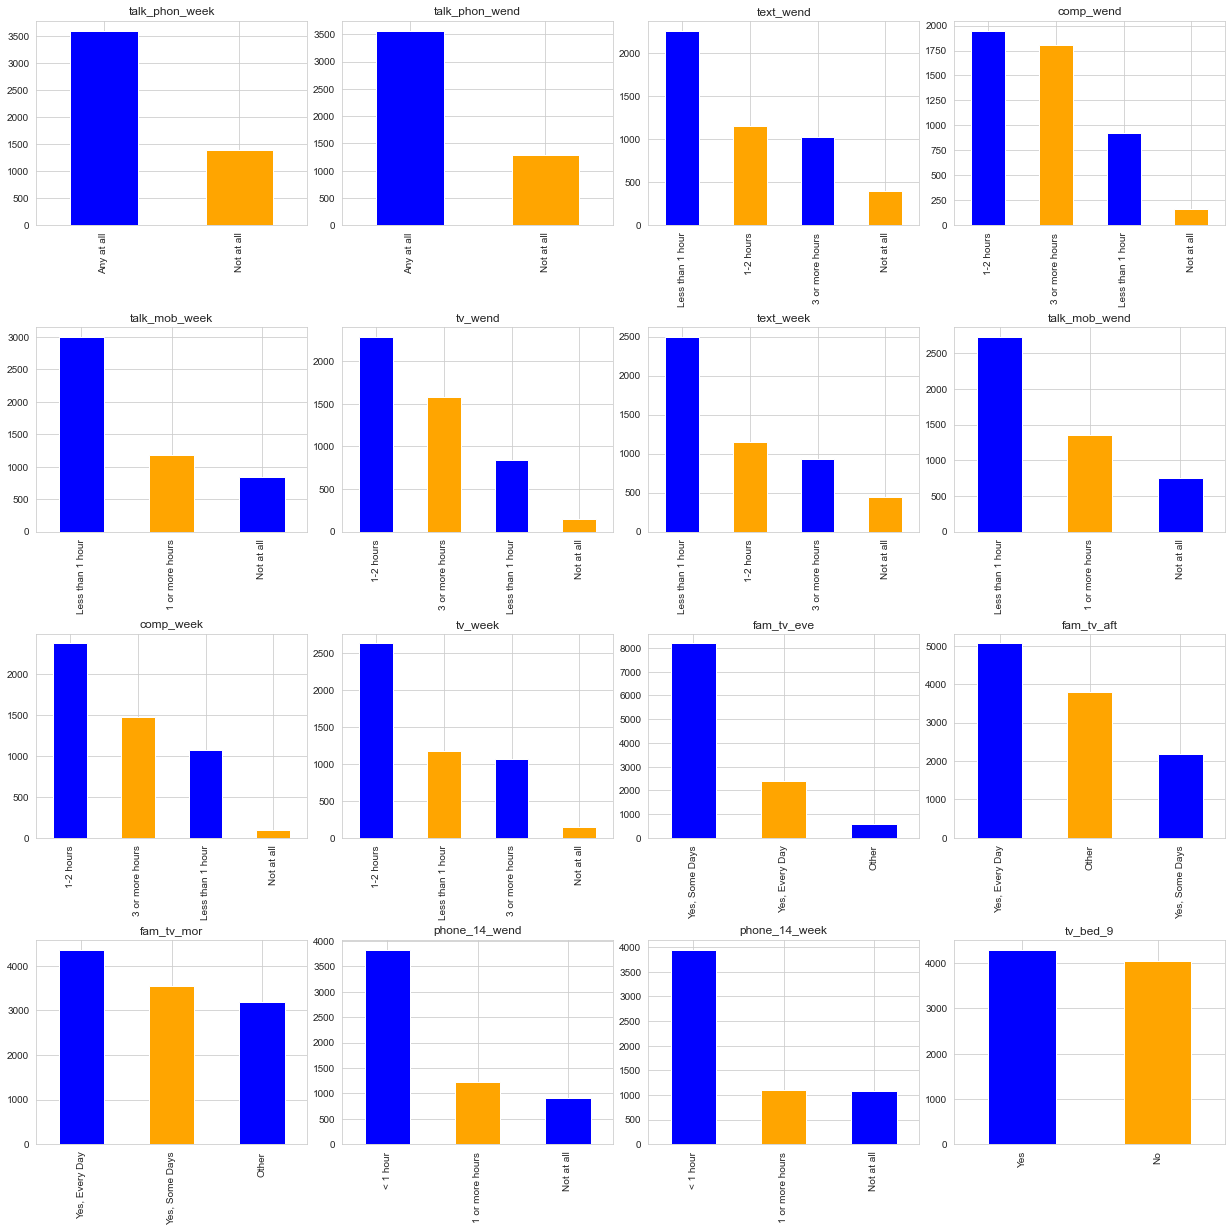

In [210]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(17,17),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()


In [211]:
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score","dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]

df['has_dep_diag'] = pd.Categorical(df.has_dep_diag)
df['secd_diag'] = pd.Categorical(df.secd_diag)
df['prim_diag'] = pd.Categorical(df.prim_diag)
df['panic_score'] = pd.Categorical(df.panic_score)
df['dep_score'] = pd.Categorical(df.dep_score)
df[categorical_features].describe(include='all')

,has_dep_diag,secd_diag,prim_diag,panic_score,dep_score,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07
count,4513,4513.0,4513.0,4513.0,4513.0,5299,7003,7679,8089,5303,7158,7852,8280
unique,2,9.0,12.0,5.0,5.0,5,5,5,4,5,6,6,5
top,No ICD-10 diagnosis of depression,0.0,0.0,0.0,0.0,~0.5%,<0.1%,<0.1%,<0.1%,~3%,~3%,~3%,~3%
freq,4124,3980.0,3573.0,4413.0,3463.0,2976,4022,4500,5050,2740,3821,4167,3907


In [212]:
percentages = []
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
df[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,4999,4850,4841,4839,5016,4853,5004,4834,5011,5020,11174,11038,11096,5962,6131,8348
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,Yes
freq,3602,3568,2261,1950,3001,2287,2495,2728,2375,2634,8199,5065,4360,3828,3949,4300


In [213]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
testdf = df.loc[df['has_dep_diag'] == "Yes ICD-10 diagnosis of depression"]
testdf[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,253,250,249,247,256,249,254,249,256,256,351,351,343,271,278,321
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,3 or more hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,176,177,102,99,148,112,114,141,116,136,242,149,133,169,171,175


In [214]:
testdf2 = df.loc[df['has_dep_diag'] == " No ICD-10 diagnosis of depression"]
testdf2[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,2899,2837,2834,2830,2908,2836,2899,2827,2907,2909,3696,3647,3668,2964,3051,3402
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,2084,2106,1395,1155,1813,1352,1534,1663,1369,1541,2580,1630,1484,1941,2004,1959


{'talk_phon_week': 0.02321640145777404, 'talk_phon_wend': 0.0343334508283398, 'text_wend': 0.04129928323031008, 'comp_wend': 0.006904050013590648, 'talk_mob_week': 0.030218363136176086, 'tv_wend': 0.01622569261531315, 'text_week': 0.04016454221249249, 'talk_mob_wend': 0.014660694422543382, 'comp_week': 0.024231649896800826, 'tv_week': 0.013175033301821942, 'fam_tv_eve': 0.014013764013763986, 'fam_tv_aft': 0.01644823269903244, 'fam_tv_mor': 0.01962922573609599, 'phone_14_wend': 0.0354919136235897, 'phone_14_week': 0.027817274204235437, 'tv_bed_9': 0.03066640294054629}


<BarContainer object of 16 artists>

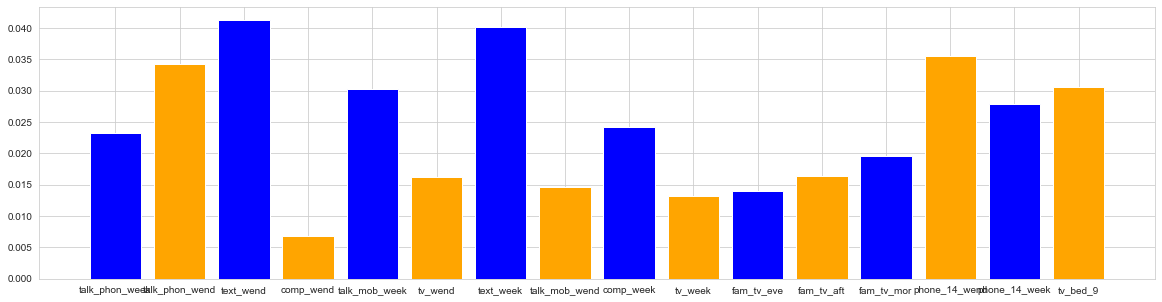

In [215]:
sns.set_style("whitegrid")
avg_percent_diff = {}
for category in categorical_features:
    percentages = testdf2[category].value_counts() / testdf2[category].value_counts().sum()
    percentages2 = testdf[category].value_counts() / testdf[category].value_counts().sum()
    output = percentages.copy()
    total = 0
    for i in range(len(output)):
        total += abs(percentages[i]- percentages2[i])
    avg = total/len(output)
    avg_percent_diff[category]= avg
    #percentages[0] =percentages[0] - percentages2[0]
    #print(percentages[0])
print(avg_percent_diff)
names = list(avg_percent_diff.keys())
values = list(avg_percent_diff.values())
f, ax = plt.subplots(figsize=(20,5))
plt.bar(range(len(avg_percent_diff)), values, tick_label=names,color=['blue', 'orange'])

<ipython-input-216-3287077c93bb>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



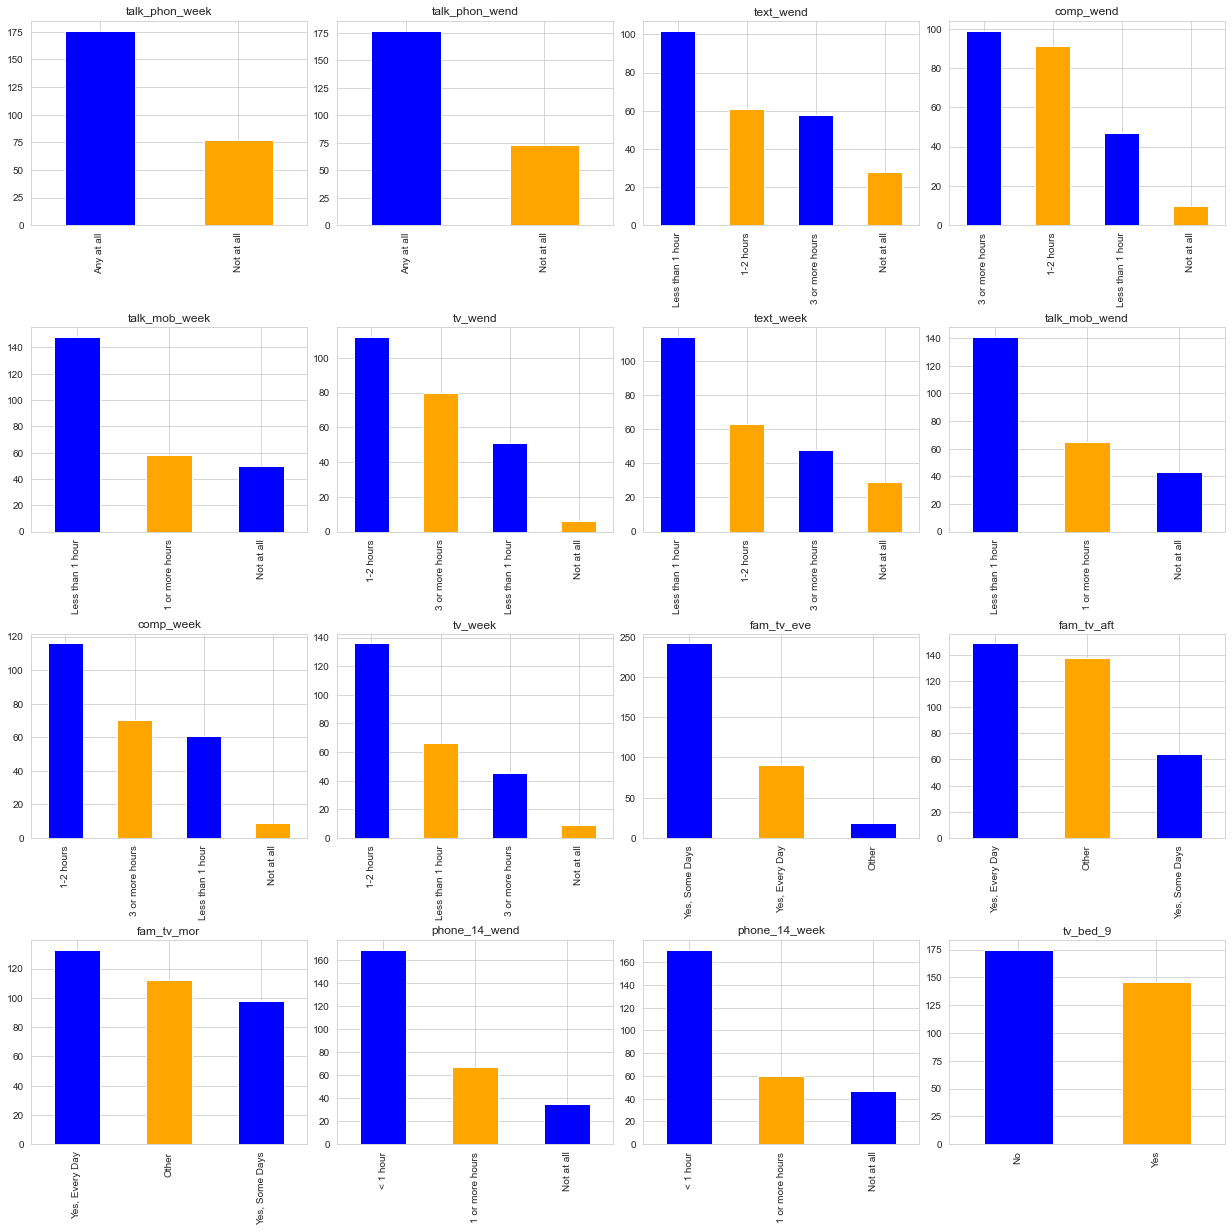

In [216]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(17,17),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        testdf[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()

<Figure size 1080x1080 with 0 Axes>

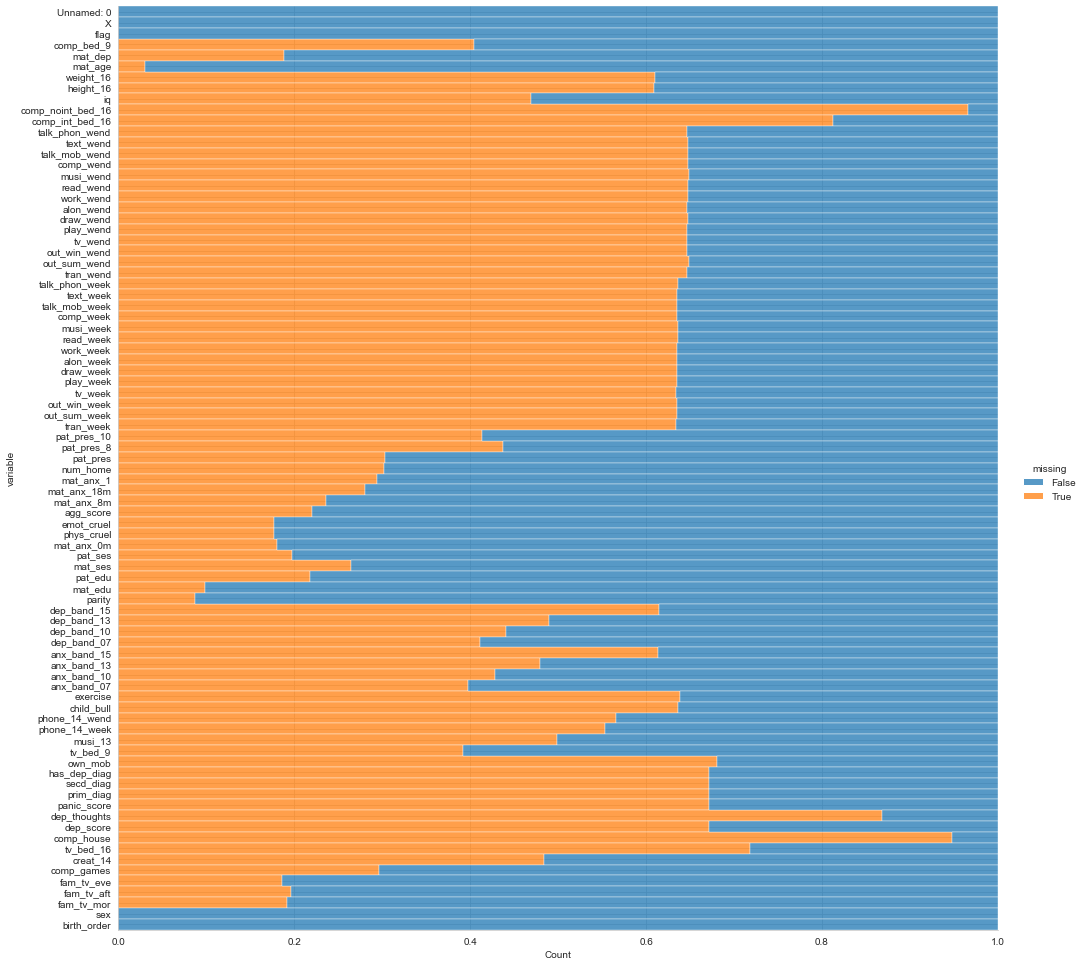

In [217]:
plt.figure(figsize=(15,15))
g = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3
)
g.fig.set_size_inches(15,15)

               0
count  85.000000
mean    0.482574
std     0.235299
min     0.000000
25%     0.293724
50%     0.613878
75%     0.646862
max     0.965706
-0.5401155460353062


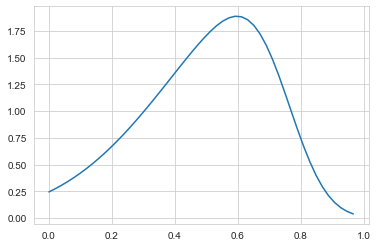

In [218]:
from scipy.stats import skew
percentages = []
for col in df.columns:
    percentages.append(df[col].isnull().sum()/len(df[col]))
df_describe = pd.DataFrame(percentages)
df_describe.describe()
print(df_describe.describe())
print(skew(percentages))

X = np.linspace(min(percentages), max(percentages))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(percentages)))

shows comp_no_int can be removed and comphouse and dep thoughts. aka set the threshhold to 70% as important vartiables are at 67%


In [5]:
from scipy import stats
from scipy.stats import chi2_contingency
passing_has_dep=[]
for col in df.columns:
    contingency = pd.crosstab(index=df[col], columns=df['has_dep_diag'],margins=True)
    stat, p, dof, expected = chi2_contingency(contingency)
  
    alpha = 0.05
    #print("p value for "+col+" is " + str(p))
    if p <= alpha:
        #print("p value for "+col+" is " + str(p))
        #print('Dependent (reject H0)')
        passing_has_dep.append(col)
    else:
        #print('Independent (H0 holds true)')
        hello=1
passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for dep in depressedcols:
    for col in df.columns:
        contingency = pd.crosstab(index=df[col], columns=df[dep],margins=True)
        stat, p, dof, expected = chi2_contingency(contingency)

        alpha = 0.025
        #print("p value for "+col+" is " + str(p))
        if p <= alpha:
            #print("p value for "+col+" is " + str(p))
            #print('Dependent (reject H0)')
            if col not in passing_all_deps:
                passing_all_deps.append(col)
        else:
            #print('Independent (H0 holds true)')
            hello=1
print(passing_has_dep)
print(passing_all_deps)
#fig = plt.figure(figsize=(6,6))
#sns.heatmap(resultant, annot=True, cmap='Blues')
#plt.title('Chi-Square Test Results')
#plt.show()

['parity', 'dep_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex']
['agg_score', 'dep_band_15', 'dep_band_10', 'anx_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex', 'birth_order', 'pat_edu', 'child_bull', 'mat_age', 'anx_band_07', 'mat_anx_0m']


In [25]:
display(df)
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix

passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for row in df.columns:
    for col in df.columns:
        if (row!=col):
            test = df[[col,row]]
            test = test.dropna()
            #display(test)
            contingency = pd.crosstab(index=test[col], columns=test[row],margins=True)
            stat, p, dof, expected = chi2_contingency(contingency)
            resultant.loc[row,col] = p
            #alpha = 0.025
            print(row+' vs '+col+' = '+str(p))
            #print("p value for "+col+" is " + str(p))
            #if p <= alpha:
                #print("p value for "+col+" is " + str(p))
                #print('Dependent (reject H0)')
                #if col not in passing_all_deps:
                    #passing_all_deps.append(col)
            #else:
                #print('Independent (H0 holds true)')
                #hello=1
print(resultant)

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,...,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,...,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,13730,synthetic,NaN,13.0,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Every Day","Yes, Every Day","Yes, Every Day",Female,A
13730,13731,13731,synthetic,No,6.0,29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,"Yes, Every Day",Other,Other,Male,A
13731,13732,13732,synthetic,NaN,21.0,37,58.075832,169.235565,108.0,NaN,...,NaN,NaN,NaN,often,No,Other,Other,Other,Male,A
13732,13733,13733,synthetic,No,10.0,30,NaN,NaN,103.0,NaN,...,0.0,Yes,NaN,sometimes,No,"Yes, Some Days",Other,"Yes, Every Day",Male,A


Unnamed: 0 vs X = 0.7602446062631142
Unnamed: 0 vs flag = 1.0
Unnamed: 0 vs comp_bed_9 = 1.0
Unnamed: 0 vs mat_dep = 1.0
Unnamed: 0 vs mat_age = 1.0
Unnamed: 0 vs weight_16 = 0.7602773244772696
Unnamed: 0 vs height_16 = 0.7602362872495712
Unnamed: 0 vs iq = 0.999999998790309
Unnamed: 0 vs comp_noint_bed_16 = 1.0
Unnamed: 0 vs comp_int_bed_16 = 1.0
Unnamed: 0 vs talk_phon_wend = 1.0
Unnamed: 0 vs text_wend = 1.0
Unnamed: 0 vs talk_mob_wend = 1.0
Unnamed: 0 vs comp_wend = 1.0
Unnamed: 0 vs musi_wend = 1.0
Unnamed: 0 vs read_wend = 1.0
Unnamed: 0 vs work_wend = 1.0
Unnamed: 0 vs alon_wend = 1.0
Unnamed: 0 vs draw_wend = 1.0
Unnamed: 0 vs play_wend = 1.0
Unnamed: 0 vs tv_wend = 1.0
Unnamed: 0 vs out_win_wend = 1.0
Unnamed: 0 vs out_sum_wend = 1.0
Unnamed: 0 vs tran_wend = 1.0
Unnamed: 0 vs talk_phon_week = 1.0
Unnamed: 0 vs text_week = 1.0
Unnamed: 0 vs talk_mob_week = 1.0
Unnamed: 0 vs comp_week = 1.0
Unnamed: 0 vs musi_week = 1.0
Unnamed: 0 vs read_week = 1.0
Unnamed: 0 vs work_week = 1.

comp_bed_9 vs mat_anx_8m = 0.6235771107979422
comp_bed_9 vs agg_score = 0.9473916519757288
comp_bed_9 vs emot_cruel = 0.996451780346987
comp_bed_9 vs phys_cruel = 0.9699076744542089
comp_bed_9 vs mat_anx_0m = 0.9631594238509494
comp_bed_9 vs pat_ses = 6.227925782252295e-15
comp_bed_9 vs mat_ses = 0.003820379596646384
comp_bed_9 vs pat_edu = 8.765064035156946e-14
comp_bed_9 vs mat_edu = 2.006870910777231e-09
comp_bed_9 vs parity = 0.28240051883091444
comp_bed_9 vs dep_band_15 = 0.6472568621285731
comp_bed_9 vs dep_band_13 = 0.9732736948128485
comp_bed_9 vs dep_band_10 = 0.3101360859937701
comp_bed_9 vs dep_band_07 = 0.9173304266486028
comp_bed_9 vs anx_band_15 = 0.25796772485513614
comp_bed_9 vs anx_band_13 = 0.9997693016516925
comp_bed_9 vs anx_band_10 = 0.31026144254686516
comp_bed_9 vs anx_band_07 = 0.0004112196054433265
comp_bed_9 vs exercise = 0.8898860535753551
comp_bed_9 vs child_bull = 0.999974153226947
comp_bed_9 vs phone_14_wend = 0.3362043090198698
comp_bed_9 vs phone_14_week

mat_age vs prim_diag = 0.9999883291914005
mat_age vs panic_score = 1.6716642678585446e-08
mat_age vs dep_thoughts = 0.6508737403858601
mat_age vs dep_score = 0.9390181795420028
mat_age vs comp_house = 1.0
mat_age vs tv_bed_16 = 1.0
mat_age vs creat_14 = 0.9993832401298876
mat_age vs comp_games = 0.9988866846569475
mat_age vs fam_tv_eve = 3.9857728985596414e-27
mat_age vs fam_tv_aft = 6.235665652254241e-12
mat_age vs fam_tv_mor = 4.408793884091832e-38
mat_age vs sex = 0.043119975390891054
mat_age vs birth_order = 0.9933455898462142
weight_16 vs Unnamed: 0 = 0.7602773244518738
weight_16 vs X = 0.7602773244518738
weight_16 vs flag = 1.0
weight_16 vs comp_bed_9 = 1.0
weight_16 vs mat_dep = 1.0
weight_16 vs mat_age = 1.0
weight_16 vs height_16 = 0.7602773244518738
weight_16 vs iq = 0.9999996572075063
weight_16 vs comp_noint_bed_16 = 1.0
weight_16 vs comp_int_bed_16 = 1.0
weight_16 vs talk_phon_wend = 1.0
weight_16 vs text_wend = 1.0
weight_16 vs talk_mob_wend = 1.0
weight_16 vs comp_wend = 

iq vs prim_diag = 0.24908333428410184
iq vs panic_score = 0.7753910444411061
iq vs dep_thoughts = 0.9995431849413389
iq vs dep_score = 0.9798356729722622
iq vs comp_house = 1.0
iq vs tv_bed_16 = 1.0
iq vs creat_14 = 0.6060521032440392
iq vs comp_games = 0.9999999952781466
iq vs fam_tv_eve = 0.031030503749205036
iq vs fam_tv_aft = 0.6387073884286306
iq vs fam_tv_mor = 0.17340413096583246
iq vs sex = 0.9999998958522058
iq vs birth_order = 1.0
comp_noint_bed_16 vs Unnamed: 0 = 1.0
comp_noint_bed_16 vs X = 1.0
comp_noint_bed_16 vs flag = 1.0
comp_noint_bed_16 vs comp_bed_9 = 1.0
comp_noint_bed_16 vs mat_dep = 1.0
comp_noint_bed_16 vs mat_age = 1.0
comp_noint_bed_16 vs weight_16 = 1.0
comp_noint_bed_16 vs height_16 = 1.0
comp_noint_bed_16 vs iq = 1.0
comp_noint_bed_16 vs comp_int_bed_16 = 1.0
comp_noint_bed_16 vs talk_phon_wend = 1.0
comp_noint_bed_16 vs text_wend = 1.0
comp_noint_bed_16 vs talk_mob_wend = 1.0
comp_noint_bed_16 vs comp_wend = 1.0
comp_noint_bed_16 vs musi_wend = 1.0
comp_no

talk_phon_wend vs mat_anx_1 = 0.9259732578695902
talk_phon_wend vs mat_anx_18m = 0.06877321228962413
talk_phon_wend vs mat_anx_8m = 0.9945170590672873
talk_phon_wend vs agg_score = 0.9542995886839553
talk_phon_wend vs emot_cruel = 0.9339478184022675
talk_phon_wend vs phys_cruel = 0.4806974106260573
talk_phon_wend vs mat_anx_0m = 0.917506559216669
talk_phon_wend vs pat_ses = 0.785997363230057
talk_phon_wend vs mat_ses = 0.983547909179817
talk_phon_wend vs pat_edu = 0.9583298743091883
talk_phon_wend vs mat_edu = 0.5892540327386077
talk_phon_wend vs parity = 0.4283308576454227
talk_phon_wend vs dep_band_15 = 0.9340692729216495
talk_phon_wend vs dep_band_13 = 0.9998419243998584
talk_phon_wend vs dep_band_10 = 0.8870384130597603
talk_phon_wend vs dep_band_07 = 0.24988133993392583
talk_phon_wend vs anx_band_15 = 0.8683762076150074
talk_phon_wend vs anx_band_13 = 0.7093894859913161
talk_phon_wend vs anx_band_10 = 0.9619974844409542
talk_phon_wend vs anx_band_07 = 0.9750419960916721
talk_phon_

talk_mob_wend vs dep_band_13 = 0.9974578263900209
talk_mob_wend vs dep_band_10 = 0.14061978616922752
talk_mob_wend vs dep_band_07 = 0.4871600120711138
talk_mob_wend vs anx_band_15 = 0.9318132115169707
talk_mob_wend vs anx_band_13 = 0.9894016234388578
talk_mob_wend vs anx_band_10 = 0.049260827404800395
talk_mob_wend vs anx_band_07 = 0.9997222625123244
talk_mob_wend vs exercise = 0.8806250660270518
talk_mob_wend vs child_bull = 0.7837589530322591
talk_mob_wend vs phone_14_wend = 1.8307328760933685e-44
talk_mob_wend vs phone_14_week = 1.7420144630618772e-28
talk_mob_wend vs musi_13 = 0.34616813769788696
talk_mob_wend vs tv_bed_9 = 7.526628139034687e-09
talk_mob_wend vs own_mob = 0.0022760391974305763
talk_mob_wend vs has_dep_diag = 0.9936310851402144
talk_mob_wend vs secd_diag = 0.9998883048482893
talk_mob_wend vs prim_diag = 0.8739984564404653
talk_mob_wend vs panic_score = 0.9983654050840348
talk_mob_wend vs dep_thoughts = 0.7896510579164355
talk_mob_wend vs dep_score = 0.04450845142964

musi_wend vs dep_score = 0.955331235790581
musi_wend vs comp_house = 1.0
musi_wend vs tv_bed_16 = 1.0
musi_wend vs creat_14 = 1.4500238699450775e-33
musi_wend vs comp_games = 0.148146438490531
musi_wend vs fam_tv_eve = 0.2826392772245886
musi_wend vs fam_tv_aft = 0.8136036148712656
musi_wend vs fam_tv_mor = 0.4054322877688523
musi_wend vs sex = 0.0008020424777414162
musi_wend vs birth_order = 0.055141350136708754
read_wend vs Unnamed: 0 = 1.0
read_wend vs X = 1.0
read_wend vs flag = 1.0
read_wend vs comp_bed_9 = 0.21710812627538623
read_wend vs mat_dep = 0.9814384037170838
read_wend vs mat_age = 0.4494893541794903
read_wend vs weight_16 = 1.0
read_wend vs height_16 = 1.0
read_wend vs iq = 0.011400952909607572
read_wend vs comp_noint_bed_16 = 1.0
read_wend vs comp_int_bed_16 = 1.0
read_wend vs talk_phon_wend = 0.9097433852586434
read_wend vs text_wend = 6.297495766558672e-07
read_wend vs talk_mob_wend = 1.0889435700659723e-12
read_wend vs comp_wend = 0.2961382016256461
read_wend vs musi

alon_wend vs tv_wend = 0.0009025441229955806
alon_wend vs out_win_wend = 0.471048961468847
alon_wend vs out_sum_wend = 0.03294170361858783
alon_wend vs tran_wend = 0.7488701305037354
alon_wend vs talk_phon_week = 0.44174952687044544
alon_wend vs text_week = 1.422571445156876e-07
alon_wend vs talk_mob_week = 2.0295396128938738e-11
alon_wend vs comp_week = 8.012902281793824e-14
alon_wend vs musi_week = 0.07470779931839688
alon_wend vs read_week = 1.0314635532283187e-11
alon_wend vs work_week = 7.373480261833947e-09
alon_wend vs alon_week = 0.0
alon_wend vs draw_week = 0.15071453184732161
alon_wend vs play_week = 0.22334439309807064
alon_wend vs tv_week = 0.02252085161424505
alon_wend vs out_win_week = 0.9987977806074191
alon_wend vs out_sum_week = 0.009044213071933293
alon_wend vs tran_week = 0.7650196483162229
alon_wend vs pat_pres_10 = 0.9211715062515425
alon_wend vs pat_pres_8 = 0.7559030007665842
alon_wend vs pat_pres = 0.9877417290013414
alon_wend vs num_home = 0.01238271645153475
a

play_wend vs mat_anx_1 = 0.7339285984945718
play_wend vs mat_anx_18m = 0.849991735587226
play_wend vs mat_anx_8m = 0.41060051279212517
play_wend vs agg_score = 0.7019676997206804
play_wend vs emot_cruel = 0.9933173657787002
play_wend vs phys_cruel = 0.9957145148561906
play_wend vs mat_anx_0m = 0.9987674972499645
play_wend vs pat_ses = 0.6685660523402945
play_wend vs mat_ses = 0.77535769435331
play_wend vs pat_edu = 0.23860590222120387
play_wend vs mat_edu = 0.759083889714815
play_wend vs parity = 0.9178551567685252
play_wend vs dep_band_15 = 0.08808482949174697
play_wend vs dep_band_13 = 0.874597856988194
play_wend vs dep_band_10 = 0.7929745166221794
play_wend vs dep_band_07 = 0.7486064850693006
play_wend vs anx_band_15 = 0.9999180464241311
play_wend vs anx_band_13 = 0.9037098902252998
play_wend vs anx_band_10 = 0.4904393716297085
play_wend vs anx_band_07 = 0.9934238669951393
play_wend vs exercise = 0.3353794308630162
play_wend vs child_bull = 0.29020250654368546
play_wend vs phone_14_

out_win_wend vs own_mob = 0.8361707192964489
out_win_wend vs has_dep_diag = 0.9958634557656127
out_win_wend vs secd_diag = 0.9998610303341621
out_win_wend vs prim_diag = 0.9994378630575337
out_win_wend vs panic_score = 0.9984839208369375
out_win_wend vs dep_thoughts = 0.9595850400800787
out_win_wend vs dep_score = 0.9999122384689604
out_win_wend vs comp_house = 1.0
out_win_wend vs tv_bed_16 = 1.0
out_win_wend vs creat_14 = 0.8315575688550637
out_win_wend vs comp_games = 0.8944254339779018
out_win_wend vs fam_tv_eve = 0.9408960179774011
out_win_wend vs fam_tv_aft = 0.7228296221495452
out_win_wend vs fam_tv_mor = 0.9999770870809727
out_win_wend vs sex = 0.8030583243889321
out_win_wend vs birth_order = 0.9999788600640567
out_sum_wend vs Unnamed: 0 = 1.0
out_sum_wend vs X = 1.0
out_sum_wend vs flag = 1.0
out_sum_wend vs comp_bed_9 = 0.7469171876451391
out_sum_wend vs mat_dep = 0.9964796149838222
out_sum_wend vs mat_age = 0.9838849595582446
out_sum_wend vs weight_16 = 1.0
out_sum_wend vs he

talk_phon_week vs Unnamed: 0 = 1.0
talk_phon_week vs X = 1.0
talk_phon_week vs flag = 1.0
talk_phon_week vs comp_bed_9 = 0.9774118330738077
talk_phon_week vs mat_dep = 0.9646035494508117
talk_phon_week vs mat_age = 0.9910481388282106
talk_phon_week vs weight_16 = 1.0
talk_phon_week vs height_16 = 1.0
talk_phon_week vs iq = 0.9999999976236578
talk_phon_week vs comp_noint_bed_16 = 1.0
talk_phon_week vs comp_int_bed_16 = 1.0
talk_phon_week vs talk_phon_wend = 0.0
talk_phon_week vs text_wend = 0.008353304266500694
talk_phon_week vs talk_mob_wend = 5.851639073109053e-50
talk_phon_week vs comp_wend = 0.40806569660059777
talk_phon_week vs musi_wend = 0.5632741280296744
talk_phon_week vs read_wend = 0.6889593495164608
talk_phon_week vs work_wend = 0.6253575906782434
talk_phon_week vs alon_wend = 0.4417495268704458
talk_phon_week vs draw_wend = 3.3022075873805656e-09
talk_phon_week vs play_wend = 1.0605535943099138e-07
talk_phon_week vs tv_wend = 0.5043996160078614
talk_phon_week vs out_win_wen

talk_mob_week vs work_wend = 1.2296783484128067e-10
talk_mob_week vs alon_wend = 2.0295396128938738e-11
talk_mob_week vs draw_wend = 0.011946792813098918
talk_mob_week vs play_wend = 2.6944894946840025e-38
talk_mob_week vs tv_wend = 0.0020136851843254294
talk_mob_week vs out_win_wend = 3.2422900881980575e-09
talk_mob_week vs out_sum_wend = 2.4799582618861698e-21
talk_mob_week vs tran_wend = 2.0687000884389273e-13
talk_mob_week vs talk_phon_week = 7.155087913472131e-80
talk_mob_week vs text_week = 0.0
talk_mob_week vs comp_week = 2.462549098101211e-05
talk_mob_week vs musi_week = 9.105531873998319e-14
talk_mob_week vs read_week = 1.818410792133372e-05
talk_mob_week vs work_week = 0.06550761363326965
talk_mob_week vs alon_week = 0.0009389493989855477
talk_mob_week vs draw_week = 0.7317200553249009
talk_mob_week vs play_week = 0.04455909624268099
talk_mob_week vs tv_week = 0.00010550189433467627
talk_mob_week vs out_win_week = 6.004097324282817e-20
talk_mob_week vs out_sum_week = 3.315740

musi_week vs alon_week = 0.05345374888742857
musi_week vs draw_week = 2.268301521537624e-11
musi_week vs play_week = 0.9999992411441828
musi_week vs tv_week = 3.8786788709337095e-08
musi_week vs out_win_week = 2.990411449239947e-07
musi_week vs out_sum_week = 2.0102484535683318e-11
musi_week vs tran_week = 0.07310926451142294
musi_week vs pat_pres_10 = 0.09083461417943814
musi_week vs pat_pres_8 = 0.03730518785172604
musi_week vs pat_pres = 0.19397037974224726
musi_week vs num_home = 0.9428913174875034
musi_week vs mat_anx_1 = 0.6166817477220943
musi_week vs mat_anx_18m = 0.9991323931807456
musi_week vs mat_anx_8m = 0.9782815496551166
musi_week vs agg_score = 0.032592570806311054
musi_week vs emot_cruel = 0.9878576492615415
musi_week vs phys_cruel = 0.999998347029204
musi_week vs mat_anx_0m = 0.9992602830247062
musi_week vs pat_ses = 9.098962948564503e-06
musi_week vs mat_ses = 0.003998937788337467
musi_week vs pat_edu = 2.221927394456453e-07
musi_week vs mat_edu = 0.000454186777450215

work_week vs mat_edu = 0.15005746592661498
work_week vs parity = 0.9980318928712515
work_week vs dep_band_15 = 0.9462119290391178
work_week vs dep_band_13 = 0.11753439659131457
work_week vs dep_band_10 = 0.9878808659013284
work_week vs dep_band_07 = 0.9626931975757858
work_week vs anx_band_15 = 0.4596428228698618
work_week vs anx_band_13 = 0.61884072948559
work_week vs anx_band_10 = 0.3320774454852475
work_week vs anx_band_07 = 0.5848252246969972
work_week vs exercise = 0.7991526589562177
work_week vs child_bull = 0.9747522846097102
work_week vs phone_14_wend = 0.5097032443048692
work_week vs phone_14_week = 0.016494112008564644
work_week vs musi_13 = 0.16926709163408488
work_week vs tv_bed_9 = 7.914022446479833e-06
work_week vs own_mob = 0.5119122024223646
work_week vs has_dep_diag = 0.5527005126790789
work_week vs secd_diag = 0.9479505058116486
work_week vs prim_diag = 0.9047638023222212
work_week vs panic_score = 0.42369757469403296
work_week vs dep_thoughts = 0.3359787342130186
wor

draw_week vs creat_14 = 3.236919253563069e-22
draw_week vs comp_games = 0.997760581202171
draw_week vs fam_tv_eve = 0.9578648250806041
draw_week vs fam_tv_aft = 0.9908728220685756
draw_week vs fam_tv_mor = 0.18836865369393588
draw_week vs sex = 0.43128039931927786
draw_week vs birth_order = 0.7024519059047105
play_week vs Unnamed: 0 = 1.0
play_week vs X = 1.0
play_week vs flag = 1.0
play_week vs comp_bed_9 = 0.6969209270059011
play_week vs mat_dep = 0.9989882323390716
play_week vs mat_age = 0.45057435244191674
play_week vs weight_16 = 1.0
play_week vs height_16 = 1.0
play_week vs iq = 0.9999999922943207
play_week vs comp_noint_bed_16 = 1.0
play_week vs comp_int_bed_16 = 1.0
play_week vs talk_phon_wend = 2.6083508290271763e-07
play_week vs text_wend = 7.275908705053488e-06
play_week vs talk_mob_wend = 0.05140319004113519
play_week vs comp_wend = 0.7351721972574844
play_week vs musi_wend = 0.8497355832325277
play_week vs read_wend = 0.052622269471528066
play_week vs work_wend = 2.2864051

out_win_week vs draw_wend = 0.5122688260825083
out_win_week vs play_wend = 1.5310317795610748e-26
out_win_week vs tv_wend = 0.9682114718744402
out_win_week vs out_win_wend = 0.0
out_win_week vs out_sum_wend = 5.827115163940049e-64
out_win_week vs tran_wend = 1.8506694897606732e-12
out_win_week vs talk_phon_week = 0.01560615291230772
out_win_week vs text_week = 1.1044746773478402e-08
out_win_week vs talk_mob_week = 6.004097324282817e-20
out_win_week vs comp_week = 0.2560423484949871
out_win_week vs musi_week = 2.990411449239947e-07
out_win_week vs read_week = 0.27201290683126117
out_win_week vs work_week = 0.0002233945312911993
out_win_week vs alon_week = 0.596503834297042
out_win_week vs draw_week = 0.00017979228194207945
out_win_week vs play_week = 0.008243394188480347
out_win_week vs tv_week = 0.3798895756121275
out_win_week vs out_sum_week = 5.930542079769114e-215
out_win_week vs tran_week = 0.0001476809811158702
out_win_week vs pat_pres_10 = 0.28140129484158205
out_win_week vs pat_

tran_week vs musi_week = 0.07310926451142294
tran_week vs read_week = 0.36633308898927375
tran_week vs work_week = 0.5309665306964435
tran_week vs alon_week = 0.9930546557079127
tran_week vs draw_week = 0.6831734373682519
tran_week vs play_week = 0.5776150959591488
tran_week vs tv_week = 0.03261745602283934
tran_week vs out_win_week = 0.0001476809811158702
tran_week vs out_sum_week = 0.016393106562333094
tran_week vs pat_pres_10 = 0.180564147508695
tran_week vs pat_pres_8 = 0.908091427915523
tran_week vs pat_pres = 0.9957508568440003
tran_week vs num_home = 0.8634610895842767
tran_week vs mat_anx_1 = 0.9997025725473827
tran_week vs mat_anx_18m = 0.9997375267248163
tran_week vs mat_anx_8m = 0.8574562097294237
tran_week vs agg_score = 0.999996769591646
tran_week vs emot_cruel = 0.9501811810192392
tran_week vs phys_cruel = 0.9939275330987009
tran_week vs mat_anx_0m = 0.9745679438479452
tran_week vs pat_ses = 0.10304178546537143
tran_week vs mat_ses = 0.7715603583697072
tran_week vs pat_ed

pat_pres_8 vs pat_edu = 2.159111246994519e-10
pat_pres_8 vs mat_edu = 1.3291906395992557e-17
pat_pres_8 vs parity = 0.22636766336268951
pat_pres_8 vs dep_band_15 = 0.9616361442052663
pat_pres_8 vs dep_band_13 = 0.7699224032524186
pat_pres_8 vs dep_band_10 = 0.3768352204117953
pat_pres_8 vs dep_band_07 = 0.21639403824907189
pat_pres_8 vs anx_band_15 = 0.39597706738230276
pat_pres_8 vs anx_band_13 = 0.5688261585095011
pat_pres_8 vs anx_band_10 = 0.011407038540387217
pat_pres_8 vs anx_band_07 = 0.3648006153049295
pat_pres_8 vs exercise = 0.5534535357847166
pat_pres_8 vs child_bull = 0.0022869060178559437
pat_pres_8 vs phone_14_wend = 0.07534736937432568
pat_pres_8 vs phone_14_week = 0.9588622943324703
pat_pres_8 vs musi_13 = 0.14182515999670406
pat_pres_8 vs tv_bed_9 = 5.5668238776319986e-09
pat_pres_8 vs own_mob = 7.007440279559134e-08
pat_pres_8 vs has_dep_diag = 0.9996165921781136
pat_pres_8 vs secd_diag = 0.985164305007569
pat_pres_8 vs prim_diag = 0.364915811152805
pat_pres_8 vs pani

num_home vs comp_house = 1.0
num_home vs tv_bed_16 = 1.0
num_home vs creat_14 = 0.9330833086078543
num_home vs comp_games = 0.007454454137403484
num_home vs fam_tv_eve = 0.9109595769046448
num_home vs fam_tv_aft = 0.3323038778350681
num_home vs fam_tv_mor = 0.0029765902370648676
num_home vs sex = 0.8204643348329179
num_home vs birth_order = 3.1520613359065814e-10
mat_anx_1 vs Unnamed: 0 = 1.0
mat_anx_1 vs X = 1.0
mat_anx_1 vs flag = 1.0
mat_anx_1 vs comp_bed_9 = 0.993005453402467
mat_anx_1 vs mat_dep = 1.0481458645252594e-128
mat_anx_1 vs mat_age = 0.000233790305691335
mat_anx_1 vs weight_16 = 1.0
mat_anx_1 vs height_16 = 1.0
mat_anx_1 vs iq = 0.9999999965129232
mat_anx_1 vs comp_noint_bed_16 = 1.0
mat_anx_1 vs comp_int_bed_16 = 1.0
mat_anx_1 vs talk_phon_wend = 0.9259732578695902
mat_anx_1 vs text_wend = 0.9004747863973209
mat_anx_1 vs talk_mob_wend = 0.9606232994196887
mat_anx_1 vs comp_wend = 0.9737790538381277
mat_anx_1 vs musi_wend = 0.9841984307995086
mat_anx_1 vs read_wend = 0.2

mat_anx_8m vs musi_wend = 0.945158737628869
mat_anx_8m vs read_wend = 0.26001113284162086
mat_anx_8m vs work_wend = 0.9527638863824637
mat_anx_8m vs alon_wend = 0.7773196038200453
mat_anx_8m vs draw_wend = 0.7351636523566318
mat_anx_8m vs play_wend = 0.41060051279212517
mat_anx_8m vs tv_wend = 0.9888988497545594
mat_anx_8m vs out_win_wend = 0.4090259166424556
mat_anx_8m vs out_sum_wend = 0.9845676201068891
mat_anx_8m vs tran_wend = 0.15596759504876395
mat_anx_8m vs talk_phon_week = 0.9190356782450151
mat_anx_8m vs text_week = 0.19102620411122334
mat_anx_8m vs talk_mob_week = 0.9296711155224333
mat_anx_8m vs comp_week = 0.9235517813372209
mat_anx_8m vs musi_week = 0.9782815496551166
mat_anx_8m vs read_week = 0.1970967191157831
mat_anx_8m vs work_week = 0.9852345655200903
mat_anx_8m vs alon_week = 0.7604636710768679
mat_anx_8m vs draw_week = 0.5101341291559529
mat_anx_8m vs play_week = 0.999957073609728
mat_anx_8m vs tv_week = 0.8278407755372035
mat_anx_8m vs out_win_week = 0.00489094341

emot_cruel vs tran_week = 0.9501811810192392
emot_cruel vs pat_pres_10 = 1.2994230804713874e-22
emot_cruel vs pat_pres_8 = 3.498443955320882e-21
emot_cruel vs pat_pres = 2.5756796413258705e-68
emot_cruel vs num_home = 4.970379997561689e-07
emot_cruel vs mat_anx_1 = 7.043509817805811e-38
emot_cruel vs mat_anx_18m = 1.9910994421468032e-31
emot_cruel vs mat_anx_8m = 1.0925978160015794e-35
emot_cruel vs agg_score = 0.0
emot_cruel vs phys_cruel = 0.0
emot_cruel vs mat_anx_0m = 2.991472730237696e-49
emot_cruel vs pat_ses = 2.824574008169153e-10
emot_cruel vs mat_ses = 0.8416370318071889
emot_cruel vs pat_edu = 0.0010250921371706048
emot_cruel vs mat_edu = 0.011894599325255693
emot_cruel vs parity = 0.010369424380939829
emot_cruel vs dep_band_15 = 0.5385831767993066
emot_cruel vs dep_band_13 = 0.07550327356554727
emot_cruel vs dep_band_10 = 0.0022001928044871446
emot_cruel vs dep_band_07 = 9.095773966993454e-05
emot_cruel vs anx_band_15 = 0.0645859200925148
emot_cruel vs anx_band_13 = 0.00584

mat_anx_0m vs anx_band_15 = 0.054282086253191426
mat_anx_0m vs anx_band_13 = 1.1402774770943865e-05
mat_anx_0m vs anx_band_10 = 0.0012004159497786713
mat_anx_0m vs anx_band_07 = 0.0002801515029777525
mat_anx_0m vs exercise = 0.448069533955304
mat_anx_0m vs child_bull = 0.5712760526102814
mat_anx_0m vs phone_14_wend = 0.005102165287602655
mat_anx_0m vs phone_14_week = 0.013786940435609882
mat_anx_0m vs musi_13 = 0.5440293912892944
mat_anx_0m vs tv_bed_9 = 0.8435030196370035
mat_anx_0m vs own_mob = 0.9999991253065453
mat_anx_0m vs has_dep_diag = 0.6424821672251241
mat_anx_0m vs secd_diag = 0.6628866790861243
mat_anx_0m vs prim_diag = 0.9928486388788433
mat_anx_0m vs panic_score = 0.3460443043576876
mat_anx_0m vs dep_thoughts = 0.999678846859706
mat_anx_0m vs dep_score = 0.00018268495841424406
mat_anx_0m vs comp_house = 1.0
mat_anx_0m vs tv_bed_16 = 1.0
mat_anx_0m vs creat_14 = 0.9980283313744953
mat_anx_0m vs comp_games = 0.0005947178205704341
mat_anx_0m vs fam_tv_eve = 0.990787295116638

pat_edu vs X = 1.0
pat_edu vs flag = 1.0
pat_edu vs comp_bed_9 = 8.765064035156946e-14
pat_edu vs mat_dep = 0.0322499141395556
pat_edu vs mat_age = 3.960800970609529e-143
pat_edu vs weight_16 = 1.0
pat_edu vs height_16 = 1.0
pat_edu vs iq = 2.167439662707804e-35
pat_edu vs comp_noint_bed_16 = 1.0
pat_edu vs comp_int_bed_16 = 1.0
pat_edu vs talk_phon_wend = 0.9583298743091883
pat_edu vs text_wend = 4.589702508159294e-17
pat_edu vs talk_mob_wend = 6.803121795343906e-15
pat_edu vs comp_wend = 0.9515987323643788
pat_edu vs musi_wend = 4.465324111719861e-08
pat_edu vs read_wend = 0.0018336542631936818
pat_edu vs work_wend = 2.4184809398494325e-05
pat_edu vs alon_wend = 6.617980667037296e-06
pat_edu vs draw_wend = 0.2930772391068643
pat_edu vs play_wend = 0.23860590222120387
pat_edu vs tv_wend = 0.12416860331274027
pat_edu vs out_win_wend = 0.021379385134235176
pat_edu vs out_sum_wend = 0.792386801865724
pat_edu vs tran_wend = 0.8377376761525419
pat_edu vs talk_phon_week = 0.8469579130127798

parity vs alon_week = 0.953987870924492
parity vs draw_week = 0.9451415467495287
parity vs play_week = 0.990493936823559
parity vs tv_week = 0.9428896160653254
parity vs out_win_week = 0.024525008043710383
parity vs out_sum_week = 0.9558864081472873
parity vs tran_week = 0.6399345946864863
parity vs pat_pres_10 = 0.22813011488079
parity vs pat_pres_8 = 0.22636766336268951
parity vs pat_pres = 9.838848792578437e-06
parity vs num_home = 0.0
parity vs mat_anx_1 = 0.00012238846618074886
parity vs mat_anx_18m = 0.013475522624046438
parity vs mat_anx_8m = 3.300694934228163e-13
parity vs agg_score = 0.020098841912949673
parity vs emot_cruel = 0.01036942438093987
parity vs phys_cruel = 0.9894772704366172
parity vs mat_anx_0m = 0.004920932130259575
parity vs pat_ses = 0.018407808271764536
parity vs mat_ses = 1.697541279220919e-17
parity vs pat_edu = 0.06949128953110664
parity vs mat_edu = 5.354959092041356e-22
parity vs dep_band_15 = 0.40064057726307406
parity vs dep_band_13 = 0.996087207321968

dep_band_13 vs parity = 0.9960872073219689
dep_band_13 vs dep_band_15 = 0.3126665619289124
dep_band_13 vs dep_band_10 = 1.549962525978542e-97
dep_band_13 vs dep_band_07 = 2.9850026316069e-31
dep_band_13 vs anx_band_15 = 0.7845551842215932
dep_band_13 vs anx_band_13 = 3.282609272514932e-224
dep_band_13 vs anx_band_10 = 2.0343215558129822e-45
dep_band_13 vs anx_band_07 = 2.5145937471586016e-11
dep_band_13 vs exercise = 0.09393685799989344
dep_band_13 vs child_bull = 0.7764352545944925
dep_band_13 vs phone_14_wend = 0.7911891719955441
dep_band_13 vs phone_14_week = 0.9859299330485222
dep_band_13 vs musi_13 = 0.786738091004922
dep_band_13 vs tv_bed_9 = 0.3403098126636676
dep_band_13 vs own_mob = 0.89868252089583
dep_band_13 vs has_dep_diag = 0.4935496199540421
dep_band_13 vs secd_diag = 0.9771725069746593
dep_band_13 vs prim_diag = 0.8793888317483814
dep_band_13 vs panic_score = 0.9343476186803001
dep_band_13 vs dep_thoughts = 0.16449287082200692
dep_band_13 vs dep_score = 0.14096271060182

dep_band_07 vs has_dep_diag = 0.7013372489905059
dep_band_07 vs secd_diag = 0.6954460035777825
dep_band_07 vs prim_diag = 0.4913596863157521
dep_band_07 vs panic_score = 0.16052558543149045
dep_band_07 vs dep_thoughts = 0.08156089062448041
dep_band_07 vs dep_score = 0.03901798243342624
dep_band_07 vs comp_house = 1.0
dep_band_07 vs tv_bed_16 = 1.0
dep_band_07 vs creat_14 = 0.03338161338102977
dep_band_07 vs comp_games = 0.6989370901077028
dep_band_07 vs fam_tv_eve = 0.5363643687442423
dep_band_07 vs fam_tv_aft = 0.23483591590083594
dep_band_07 vs fam_tv_mor = 0.9988115076075929
dep_band_07 vs sex = 0.20887540806523475
dep_band_07 vs birth_order = 0.8993826467217141
anx_band_15 vs Unnamed: 0 = 1.0
anx_band_15 vs X = 1.0
anx_band_15 vs flag = 1.0
anx_band_15 vs comp_bed_9 = 0.25796772485513614
anx_band_15 vs mat_dep = 0.8495405320373793
anx_band_15 vs mat_age = 0.16594900862874898
anx_band_15 vs weight_16 = 1.0
anx_band_15 vs height_16 = 1.0
anx_band_15 vs iq = 0.9971949427331006
anx_ban

anx_band_10 vs Unnamed: 0 = 1.0
anx_band_10 vs X = 1.0
anx_band_10 vs flag = 1.0
anx_band_10 vs comp_bed_9 = 0.31026144254686555
anx_band_10 vs mat_dep = 1.263827425417248e-06
anx_band_10 vs mat_age = 0.7729869583450787
anx_band_10 vs weight_16 = 1.0
anx_band_10 vs height_16 = 1.0
anx_band_10 vs iq = 0.9999641784156627
anx_band_10 vs comp_noint_bed_16 = 1.0
anx_band_10 vs comp_int_bed_16 = 1.0
anx_band_10 vs talk_phon_wend = 0.9619974844409542
anx_band_10 vs text_wend = 0.5130937271710001
anx_band_10 vs talk_mob_wend = 0.049260827404800395
anx_band_10 vs comp_wend = 0.09301176573661182
anx_band_10 vs musi_wend = 0.9858376229800905
anx_band_10 vs read_wend = 0.9924145650037433
anx_band_10 vs work_wend = 0.35371048302587993
anx_band_10 vs alon_wend = 0.962195381749548
anx_band_10 vs draw_wend = 0.9925589746483514
anx_band_10 vs play_wend = 0.4904393716297085
anx_band_10 vs tv_wend = 0.9460683024458746
anx_band_10 vs out_win_wend = 0.5551641030442305
anx_band_10 vs out_sum_wend = 0.860817

exercise vs tv_wend = 0.9001325067178347
exercise vs out_win_wend = 4.886420326340896e-16
exercise vs out_sum_wend = 0.013504902977926024
exercise vs tran_wend = 0.13484386649972957
exercise vs talk_phon_week = 0.45074083264319664
exercise vs text_week = 0.001095032075702156
exercise vs talk_mob_week = 0.18538983053852756
exercise vs comp_week = 0.6704541729464033
exercise vs musi_week = 0.05545052306896556
exercise vs read_week = 0.8744708956040971
exercise vs work_week = 0.7991526589562177
exercise vs alon_week = 0.9304859260713019
exercise vs draw_week = 0.7198913759027026
exercise vs play_week = 0.7309616418911502
exercise vs tv_week = 0.8738038338398016
exercise vs out_win_week = 5.42160564848911e-15
exercise vs out_sum_week = 0.00022678146655100048
exercise vs tran_week = 0.43924099672019706
exercise vs pat_pres_10 = 0.1460502993394218
exercise vs pat_pres_8 = 0.5534535357847169
exercise vs pat_pres = 0.10281824023397866
exercise vs num_home = 0.7483461930411417
exercise vs mat_a

phone_14_wend vs out_sum_week = 1.163899897645741e-05
phone_14_wend vs tran_week = 0.04804027238411454
phone_14_wend vs pat_pres_10 = 0.17362185692515428
phone_14_wend vs pat_pres_8 = 0.07534736937432568
phone_14_wend vs pat_pres = 0.0392760650354323
phone_14_wend vs num_home = 0.5712029285459937
phone_14_wend vs mat_anx_1 = 0.23203203946200612
phone_14_wend vs mat_anx_18m = 0.12754640401739403
phone_14_wend vs mat_anx_8m = 0.23122796269043025
phone_14_wend vs agg_score = 0.000355400264442855
phone_14_wend vs emot_cruel = 0.09226835695522714
phone_14_wend vs phys_cruel = 0.30953409932051784
phone_14_wend vs mat_anx_0m = 0.005102165287602655
phone_14_wend vs pat_ses = 0.0219650582012346
phone_14_wend vs mat_ses = 0.013039403315422277
phone_14_wend vs pat_edu = 0.048290874417112
phone_14_wend vs mat_edu = 7.891166193571774e-07
phone_14_wend vs parity = 0.4158766237945174
phone_14_wend vs dep_band_15 = 0.9103021803559145
phone_14_wend vs dep_band_13 = 0.7911891719955441
phone_14_wend vs d

musi_13 vs parity = 0.9985119186986169
musi_13 vs dep_band_15 = 0.0008198401055841473
musi_13 vs dep_band_13 = 0.7867380910049221
musi_13 vs dep_band_10 = 0.31286898769780647
musi_13 vs dep_band_07 = 0.00634400468839079
musi_13 vs anx_band_15 = 0.029270128635741226
musi_13 vs anx_band_13 = 0.6563028736271372
musi_13 vs anx_band_10 = 0.19452987783312078
musi_13 vs anx_band_07 = 0.006848228800432857
musi_13 vs exercise = 0.3192525772683645
musi_13 vs child_bull = 0.9708158366531133
musi_13 vs phone_14_wend = 0.26924306599136655
musi_13 vs phone_14_week = 0.046095585838461975
musi_13 vs tv_bed_9 = 8.165695772978589e-23
musi_13 vs own_mob = 0.0017078293240536853
musi_13 vs has_dep_diag = 0.9942016498175761
musi_13 vs secd_diag = 0.8163294664016207
musi_13 vs prim_diag = 0.9991401234341687
musi_13 vs panic_score = 0.7734780753661709
musi_13 vs dep_thoughts = 0.9710581956211802
musi_13 vs dep_score = 0.34256333034347586
musi_13 vs comp_house = 1.0
musi_13 vs tv_bed_16 = 1.0
musi_13 vs creat_

own_mob vs fam_tv_eve = 0.011587032737626712
own_mob vs fam_tv_aft = 2.6172487503274236e-05
own_mob vs fam_tv_mor = 5.086005386863602e-16
own_mob vs sex = 0.9791407497127078
own_mob vs birth_order = 0.9999938792487324
has_dep_diag vs Unnamed: 0 = 1.0
has_dep_diag vs X = 1.0
has_dep_diag vs flag = 1.0
has_dep_diag vs comp_bed_9 = 0.9924737979078297
has_dep_diag vs mat_dep = 0.9941127346707648
has_dep_diag vs mat_age = 0.9999999482534381
has_dep_diag vs weight_16 = 1.0
has_dep_diag vs height_16 = 1.0
has_dep_diag vs iq = 0.9999984245833096
has_dep_diag vs comp_noint_bed_16 = 1.0
has_dep_diag vs comp_int_bed_16 = 1.0
has_dep_diag vs talk_phon_wend = 0.8431382200159843
has_dep_diag vs text_wend = 0.3612589881474028
has_dep_diag vs talk_mob_wend = 0.9936310851402144
has_dep_diag vs comp_wend = 0.9639785016443944
has_dep_diag vs musi_wend = 0.8534604005850139
has_dep_diag vs read_wend = 0.9909700248811341
has_dep_diag vs work_wend = 0.8122909615948962
has_dep_diag vs alon_wend = 0.9904125502

prim_diag vs out_win_wend = 0.9994378630575337
prim_diag vs out_sum_wend = 0.9998537721978185
prim_diag vs tran_wend = 0.9985275449528784
prim_diag vs talk_phon_week = 0.999987931062134
prim_diag vs text_week = 0.12722049601151936
prim_diag vs talk_mob_week = 0.8886216557295307
prim_diag vs comp_week = 0.9039309126640797
prim_diag vs musi_week = 0.9981019120391457
prim_diag vs read_week = 0.9606808043149776
prim_diag vs work_week = 0.9047638023222214
prim_diag vs alon_week = 0.945078023450111
prim_diag vs draw_week = 0.9885419268967437
prim_diag vs play_week = 0.999046754240988
prim_diag vs tv_week = 0.9848766430576824
prim_diag vs out_win_week = 0.9978425971560956
prim_diag vs out_sum_week = 0.9814669510806684
prim_diag vs tran_week = 0.8730382563368445
prim_diag vs pat_pres_10 = 0.9542566918120369
prim_diag vs pat_pres_8 = 0.364915811152805
prim_diag vs pat_pres = 0.7681392465244717
prim_diag vs num_home = 0.7070824265060867
prim_diag vs mat_anx_1 = 0.7302295140540207
prim_diag vs ma

dep_thoughts vs mat_anx_1 = 0.8377064112987477
dep_thoughts vs mat_anx_18m = 0.8107367780973842
dep_thoughts vs mat_anx_8m = 0.9908024594691588
dep_thoughts vs agg_score = 0.9886919678024799
dep_thoughts vs emot_cruel = 0.9981412829589367
dep_thoughts vs phys_cruel = 0.9723038946082169
dep_thoughts vs mat_anx_0m = 0.999678846859706
dep_thoughts vs pat_ses = 0.00157615002661476
dep_thoughts vs mat_ses = 0.5488636528059307
dep_thoughts vs pat_edu = 0.15516415249485896
dep_thoughts vs mat_edu = 0.010831910936696413
dep_thoughts vs parity = 0.4841306625512684
dep_thoughts vs dep_band_15 = 0.26128250108004364
dep_thoughts vs dep_band_13 = 0.16449287082200692
dep_thoughts vs dep_band_10 = 0.17757403876335548
dep_thoughts vs dep_band_07 = 0.08156089062448041
dep_thoughts vs anx_band_15 = 0.49284551881760064
dep_thoughts vs anx_band_13 = 0.7293635301778731
dep_thoughts vs anx_band_10 = 0.9358248354423502
dep_thoughts vs anx_band_07 = 0.6416983008080305
dep_thoughts vs exercise = 0.860604493457

tv_bed_16 vs weight_16 = 1.0
tv_bed_16 vs height_16 = 1.0
tv_bed_16 vs iq = 1.0
tv_bed_16 vs comp_noint_bed_16 = 1.0
tv_bed_16 vs comp_int_bed_16 = 1.0
tv_bed_16 vs talk_phon_wend = 1.0
tv_bed_16 vs text_wend = 1.0
tv_bed_16 vs talk_mob_wend = 1.0
tv_bed_16 vs comp_wend = 1.0
tv_bed_16 vs musi_wend = 1.0
tv_bed_16 vs read_wend = 1.0
tv_bed_16 vs work_wend = 1.0
tv_bed_16 vs alon_wend = 1.0
tv_bed_16 vs draw_wend = 1.0
tv_bed_16 vs play_wend = 1.0
tv_bed_16 vs tv_wend = 1.0
tv_bed_16 vs out_win_wend = 1.0
tv_bed_16 vs out_sum_wend = 1.0
tv_bed_16 vs tran_wend = 1.0
tv_bed_16 vs talk_phon_week = 1.0
tv_bed_16 vs text_week = 1.0
tv_bed_16 vs talk_mob_week = 1.0
tv_bed_16 vs comp_week = 1.0
tv_bed_16 vs musi_week = 1.0
tv_bed_16 vs read_week = 1.0
tv_bed_16 vs work_week = 1.0
tv_bed_16 vs alon_week = 1.0
tv_bed_16 vs draw_week = 1.0
tv_bed_16 vs play_week = 1.0
tv_bed_16 vs tv_week = 1.0
tv_bed_16 vs out_win_week = 1.0
tv_bed_16 vs out_sum_week = 1.0
tv_bed_16 vs tran_week = 1.0
tv_bed_16 

comp_games vs dep_band_13 = 0.9996427336983948
comp_games vs dep_band_10 = 0.5902053184939465
comp_games vs dep_band_07 = 0.6989370901077028
comp_games vs anx_band_15 = 0.9594096904067958
comp_games vs anx_band_13 = 0.999969664350285
comp_games vs anx_band_10 = 0.9952328915191733
comp_games vs anx_band_07 = 0.9336555770923537
comp_games vs exercise = 0.8774990080199969
comp_games vs child_bull = 0.9971069842373775
comp_games vs phone_14_wend = 0.8613915549653713
comp_games vs phone_14_week = 0.999084517533692
comp_games vs musi_13 = 0.9993342974385886
comp_games vs tv_bed_9 = 1.5350330648604241e-15
comp_games vs own_mob = 0.0002343293669710504
comp_games vs has_dep_diag = 0.9999615177667623
comp_games vs secd_diag = 0.9755043301453272
comp_games vs prim_diag = 0.9906758603332705
comp_games vs panic_score = 0.99082833183114
comp_games vs dep_thoughts = 0.8738809793689921
comp_games vs dep_score = 0.9961823516550855
comp_games vs comp_house = 1.0
comp_games vs tv_bed_16 = 1.0
comp_games 

fam_tv_aft vs dep_score = 0.7341899144335584
fam_tv_aft vs comp_house = 1.0
fam_tv_aft vs tv_bed_16 = 1.0
fam_tv_aft vs creat_14 = 0.27034619450967884
fam_tv_aft vs comp_games = 0.0178789431068681
fam_tv_aft vs fam_tv_eve = 2.3593782176528938e-186
fam_tv_aft vs fam_tv_mor = 0.0
fam_tv_aft vs sex = 0.42076241179390156
fam_tv_aft vs birth_order = 0.9999936072029395
fam_tv_mor vs Unnamed: 0 = 1.0
fam_tv_mor vs X = 1.0
fam_tv_mor vs flag = 1.0
fam_tv_mor vs comp_bed_9 = 1.572403689160293e-05
fam_tv_mor vs mat_dep = 0.007826679215785011
fam_tv_mor vs mat_age = 4.408793884091832e-38
fam_tv_mor vs weight_16 = 1.0
fam_tv_mor vs height_16 = 1.0
fam_tv_mor vs iq = 0.17340413096583246
fam_tv_mor vs comp_noint_bed_16 = 1.0
fam_tv_mor vs comp_int_bed_16 = 1.0
fam_tv_mor vs talk_phon_wend = 0.9732028518461029
fam_tv_mor vs text_wend = 0.0012526237598861818
fam_tv_mor vs talk_mob_wend = 0.039449502660838624
fam_tv_mor vs comp_wend = 0.9987340949736302
fam_tv_mor vs musi_wend = 0.40543228776885243
fam

birth_order vs talk_phon_week = 0.7189004360227256
birth_order vs text_week = 0.10410409311826822
birth_order vs talk_mob_week = 0.9458828474494984
birth_order vs comp_week = 0.998051492961247
birth_order vs musi_week = 0.26094508553007495
birth_order vs read_week = 0.9809586819658301
birth_order vs work_week = 0.9685609559714126
birth_order vs alon_week = 0.9999523029475236
birth_order vs draw_week = 0.7024519059047105
birth_order vs play_week = 0.8872104992671981
birth_order vs tv_week = 0.06590229672069764
birth_order vs out_win_week = 0.8488984411804475
birth_order vs out_sum_week = 0.999999986848198
birth_order vs tran_week = 0.9998809875810322
birth_order vs pat_pres_10 = 0.999980762793089
birth_order vs pat_pres_8 = 0.9680070324290866
birth_order vs pat_pres = 0.6707599840769004
birth_order vs num_home = 3.152061335906603e-10
birth_order vs mat_anx_1 = 0.3284549564646669
birth_order vs mat_anx_18m = 0.9919726327851541
birth_order vs mat_anx_8m = 0.6174294690070463
birth_order vs

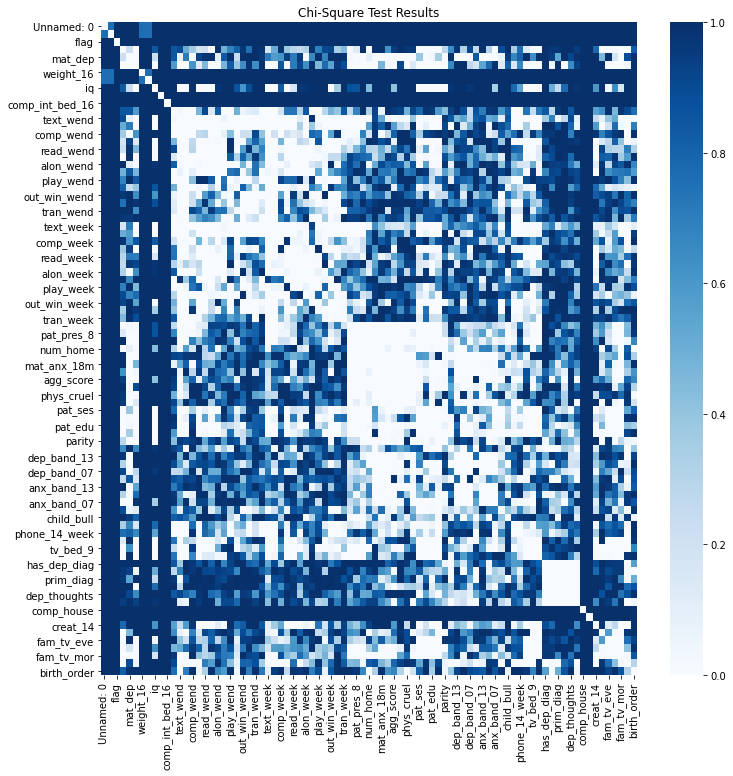

In [28]:
import seaborn as sns
resultant.to_csv(r'my_data.csv', index=False)
fig = plt.figure(figsize=(12,12))
sns.heatmap(resultant, annot=False, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()